In [1]:
import numpy as np
import pylab
import copy
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.aqua.components.optimizers import SLSQP
from qiskit.chemistry.components.initial_states import HartreeFock
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.drivers import PySCFDriver
from qiskit.chemistry.core import Hamiltonian, QubitMappingType

/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/chemistry/__init__.py:170: DeprecationWarning: The package qiskit.chemistry is deprecated. It was moved/refactored to qiskit_nature (pip install qiskit-nature). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('chemistry', 'qiskit_nature', 'qiskit-nature')
/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) an

In [2]:
#liH
#PySCF -- Python for Strongly Correlated Electron Systems

molecule = 'H .0 .0 -{0}; Li .0 .0 {0}'

#LiH, Lithium hydride
#Ionic Bond
#estimate interatomic distance: 1.6 Angstrom
#range of distances is [.5, 4.25] Angstrom

distances = np.arange(0.5, 4.25, 0.25)
vqe_energies = [] #optimized energies (VQE)
hf_energies = [] #initial guesses (hartree-fock method)
exact_energies = [] #exact energies by numpy

for i,d in enumerate(distances):
    print('step',i) 
    #intervals of 0.25 Angstrom for each step

    # set up experiment
    driver = PySCFDriver(molecule.format(d/2), basis='sto3g')
    #basis set of functions used to describe the spread of electrons in the molecule
    #typically combined atomic orbitals to approximate the molecular orbitals of the molecule

    #in setup the interatomic guess is .735 to start
    qmolecule = driver.run()

    operator =  Hamiltonian(qubit_mapping=QubitMappingType.PARITY, two_qubit_reduction=True, freeze_core=True,orbital_reduction=[-3,-2])

    qubit_op, aux_ops = operator.run(qmolecule)

    #exact classical result
    exact_result = NumPyMinimumEigensolver(qubit_op).run()
    exact_result = operator.process_algorithm_result(exact_result)

    #VQE
    optimizer = SLSQP(maxiter=1000)
    initial_state = HartreeFock(operator.molecule_info['num_orbitals'],
                                operator.molecule_info['num_particles'],
                                qubit_mapping=operator._qubit_mapping,
                                two_qubit_reduction=operator._two_qubit_reduction)
    #Ansatz for the wavefunction

    var_form = UCCSD(num_orbitals=operator.molecule_info['num_orbitals'],
                    num_particles=operator.molecule_info['num_particles'],
                    initial_state=initial_state,
                    qubit_mapping=operator._qubit_mapping,
                    two_qubit_reduction=operator._two_qubit_reduction)
    

    algo = VQE(qubit_op, var_form, optimizer, aux_operators=aux_ops)

    vqe_result = algo.run(QuantumInstance(BasicAer.get_backend('statevector_simulator')))

    vqe_result = operator.process_algorithm_result(vqe_result)

    exact_energies.append(exact_result.energy)
    vqe_energies.append(vqe_result.energy)
    hf_energies.append(vqe_result.hartree_fock_energy)



/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The Hamiltonian class is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used.
/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:88: DeprecationWarning: The ChemistryOperator is deprecated as of Qiskit Aqua 0.8.0 and will be removed no earlier than 3 months after the release date. Instead, the FermionicTransformation can be used to transform QMolecules and construct ground state result objects.
  super().__init__()


step 0


/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/chemistry/fermionic_operator.py:386: DeprecationWarning: The package qiskit.aqua.operators is deprecated. It was moved/refactored to qiskit.opflow (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  pauli_list = WeightedPauliOperator(paulis=[])
/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/chemistry/fermionic_operator.py:394: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  task_args=(threshold,), num_processes=aqua_globals.num_processes)
/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/aqua/algorithms/minimum_eigen_solvers/minimum_eigen_solver.py:38: Depre

step 1


/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/chemistry/core/chemistry_operator.py:170: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularChemistryResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  super().__init__(a_dict)
/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/qiskit/chemistry/core/hamiltonian.py:380: DeprecationWarning: The qiskit.chemistry.chemistry_operator.MolecularGroundStateResult object is deprecated as of 0.8.0 and will be removed no sooner than 3 months after the release. You should use qiskit.chemistry.algorithms.ground_state_solvers.FermionicGroundStateResult instead.
  mgsr = MolecularGroundStateResult()
/Users/jonahsachs/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The Hamiltonian

step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14


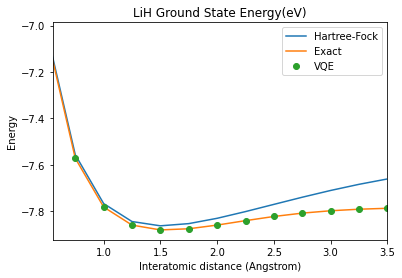

In [3]:
#plotting

pylab.plot(distances, hf_energies, label='Hartree-Fock')
pylab.plot(distances, exact_energies, label='Exact')
pylab.plot(distances, vqe_energies, 'o', label='VQE')
pylab.xlabel('Interatomic distance (Angstrom)')

pylab.ylabel('Energy')
pylab.title('LiH Ground State Energy(eV)')
pylab.legend(loc='upper right')

pylab.xlim(.55,3.5)

pylab.show()

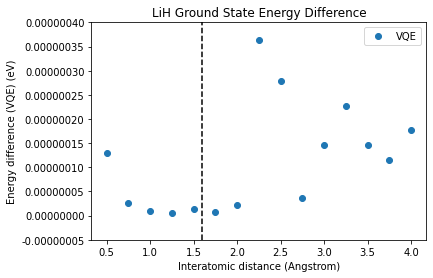

In [4]:
error_distance = []
for i in range(len(distances)):
    error_distance.append(vqe_energies[i] - exact_energies[i])

pylab.plot(distances, error_distance, 'o', label='VQE')

pylab.xlabel('Interatomic distance (Angstrom)')
pylab.ylabel('Energy difference (VQE) (eV)')

#make y ticks smaller
locs, labels = pylab.yticks()
pylab.yticks(locs, list(map(lambda x: "%.8f" % x, locs)))



pylab.title('LiH Ground State Energy Difference')

pylab.legend(loc='upper right')

#draw a vertical line at 1.6 Angstrom for the measured interatomic distance of LiH
pylab.axvline(x=1.6, color='black', linestyle='--')

pylab.show()

In [7]:
#average energy difference

print('Average difference between VQE and exact solution is: {}'.format(np.mean(error_distance)))

print("\n")

print('The VQE result is: {}'.format(vqe_energies))

print("\n")

print('The exact result is: {}'.format(exact_energies))

print("\n")

Average difference between VQE and exact solution is: 1.135933613246228e-07


The VQE result is: [-7.039732392691677, -7.571892648261558, -7.7822423934729, -7.860211747128028, -7.881015701746915, -7.8760630644594585, -7.860153185763213, -7.8410423497045105, -7.823076363233848, -7.808612359423614, -7.798363283927582, -7.791753027384241, -7.787716828308764, -7.785319601551528, -7.783918289421533]


The exact result is: [-7.039732521628313, -7.571892675307293, -7.782242402637357, -7.860211753123144, -7.881015715647112, -7.876063072528284, -7.860153207378858, -7.841042712184123, -7.823076642133832, -7.80861239638826, -7.7983634309351135, -7.79175325370317, -7.787716973585165, -7.785319717102821, -7.783918466096945]


